<a href="https://colab.research.google.com/github/Logeeshr/plotly_dashboard/blob/main/Zomato_plotly_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install jupyter-dash

In [43]:
#importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#finding difficulty in uploading  zomato dataset in google drive
#df = pd.read_csv("https://raw.githubusercontent.com/Logeeshr/plotly_dashboard/main/zomato.csv")

#country_code_df = pd.read_csv("https://raw.githubusercontent.com/Logeeshr/plotly_dashboard/main/Country-Code.xlsx%20-%20Sheet1.csv")


In [44]:
#loading the zomato dataset
df = pd.read_csv("/content/zomato.csv")
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [45]:
#shape of the dataset
df.shape

(9551, 21)

In [46]:
#loading the country code dataset
country_code_df = pd.read_csv("/content/Country-Code.xlsx - Sheet1.csv")
country_code_df

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [47]:
#joining the country code dataset and zomato dataset
zomato_df = pd.merge(df,country_code_df,on="Country Code",how='left')

In [48]:
#dropping the country code column
zomato_df.drop(columns='Country Code', axis=1, inplace= True)

In [49]:
#basic information
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   City                  9551 non-null   object 
 3   Address               9551 non-null   object 
 4   Locality              9551 non-null   object 
 5   Locality Verbose      9551 non-null   object 
 6   Longitude             9551 non-null   float64
 7   Latitude              9551 non-null   float64
 8   Cuisines              9542 non-null   object 
 9   Average Cost for two  9551 non-null   int64  
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [50]:
#missing values
zomato_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [51]:
#As we see the cuisines column has 9 missing values
zomato_df['Cuisines'].value_counts()

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

In [52]:
# As there are 1826 unique cuisines in datasets.For those 9 missing values we will replace it with 'others
zomato_df['Cuisines'].fillna("Other", inplace=True)

In [53]:
#Add a column with rupees as the currency
a = {"Botswana Pula(P)":6.47,
     "Brazilian Real(R$)":15.94,
     "Dollar($)":81.39,
     "Emirati Diram(AED)":22.16,
     "Indian Rupees(Rs.)":1,
     "Indonesian Rupiah(IDR)":0.0054,
     "NewZealand($)":51.76,
     "Pounds(專)":99.15,
     "Qatari Rial(QR)":22.36,
     "Rand(R)":4.86,
     "Sri Lankan Rupee(LKR)":0.22,
     "Turkish Lira(TL)":4.33
     }
zomato_df['indian_rupees'] = zomato_df['Currency'].replace(a)
zomato_df['total_indian_rupees'] = zomato_df['Average Cost for two'] * zomato_df['indian_rupees']

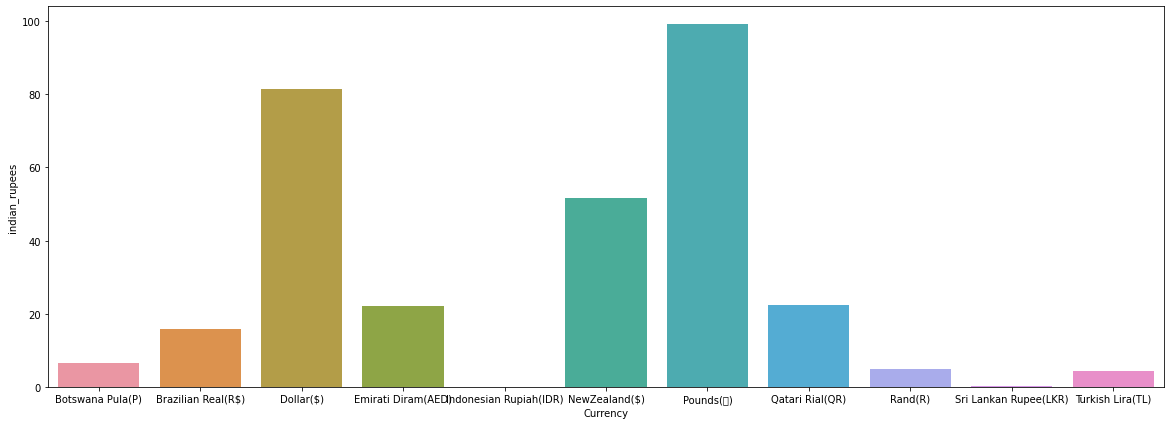

In [54]:
#plot that compares indian currency with other country’s currency
zomato_df_otherCurrency_df = zomato_df.drop(zomato_df.index[(zomato_df['Currency'] == 'Indian Rupees(Rs.)')])
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(data=zomato_df_otherCurrency_df, x="Currency", y="indian_rupees")
plt.show()

In [55]:
zomato_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country', 'indian_rupees', 'total_indian_rupees'],
      dtype='object')

In [56]:
#Grouping the country 
country_grouped = zomato_df.groupby('Country')

In [57]:
#Intializing the jupyter dashboard
app = JupyterDash(__name__)

app.layout = html.Div(children=[
    
    #Main header of the DASHBOARD   
    html.Div(children=[
            
            html.H1(children='ZOMATO DASHBOARD'), 
            html.Div(children='Never Had a Bad Meal!!')],
            style={'textAlign': 'center','backgroundColor':'#cb202d','color': 'white','font-family':["Courier New"], 
                   'font-style': ['italic'],'padding-top':'8px','padding-bottom':'5px','fontSize':20}
             ),
            html.Br(), 

    #First row of DASHBOARD
    html.Div(children=[
        
        #First segment in first row 
        html.Div([
            
            #Dropdown displays Country 
            html.P("SELECT COUNTRY",style={'fontSize':15,'textAlign':'center','color': '#cb202d'}),
            dcc.Dropdown(id="countries_dropdown",
                     options=[{'label':c, 'value':c} for c in (country_code_df['Country'])],
                     multi=False,
                     clearable=True,
                     value='India',
                     placeholder="Select Country"),
            
            #Dropdown displays City  
            html.P("SELECT CITY", style={'fontSize':15,'textAlign':'center','color': '#cb202d'}),      
            dcc.Dropdown(id="cities_dropdown",
                     multi=False,
                     clearable=True,
                     value='Agra',
                     placeholder="Select City",
                     options=[]),
            
            #By selecting the dropdown of country and city number of restaurants in that selected country and city is displayed
            html.H3(children="Number of Restaurants in selected country", style={'fontSize':15,'textAlign':'center',
                                                                                 'color': '#cb202d','font-family':["Courier New"]}),
                html.P(id="numOfRestCountry", children=8652, style={'fontSize':15,'color': 'white','textAlign':'center'}),
            
            #By selecting the dropdown of country and city number of restaurants in that selected country and city is displayed
            html.H3(children="Number of Restaurants in selected city", style={'fontSize':15,'textAlign':'center',
                                                                              'color': '#cb202d','font-family':["Courier New"]}),
                html.P(id="numOfRestCity",children=20, style={'fontSize':15,'color': 'white','textAlign':'center'}),                   
             ],style={'display':'inline-block','textAlign': 'left','backgroundColor': '#2d2d2d','color': 'black',
                        'margin-left':'25px','margin-right':'25px','width':'30%','height':'350px','border-radius':'5px',
                        'box-shadow':'2px 2px 2px #1f2c56','padding':'25px'},),
        

        
        #Second segment in first row
        #Graph displays the Number of restaurants in selected country
        
        html.Div([
            html.P("Total number of Restaurants",style={'fontSize':18,'textAlign':'center','color': '#cb202d','font-family':["Courier New"]}),            
                    dcc.Graph(
                            id="bar-chart", 
                            style={'display':'inline-block','width':'100vh','height':'400px','margin-left':'25px','margin-right':'25px',
                                   'align':'center'})]),
        html.Br(),
        
        
        #Third segment in first row
        
        html.Div([
            
            #Displays the Popular cuisines in the Selected country
            
            html.H3(children="Popular cuisine in selected country", style={'fontSize':15,'textAlign':'center','color': '#cb202d',
                                                                           'font-family':["Courier New"]}),
                html.P(id="popular_cuisine",children=20, style={'fontSize':15,'color': 'white','textAlign':'center'}),
            
            #Displays the Popular cuisines in the Selected city    
            
            html.H3(children="Popular cuisine in selected city", style={'fontSize':15,'textAlign':'center','color': '#cb202d',
                                                                        'font-family':["Courier New"]}),
                html.P(id="popular_cuisine_city",children=20, style={'fontSize':15,'color': 'white','textAlign':'center'}),
            
            #Displays the costlier cuisines in the Selected city   
            
            html.H3(children="costlier cuisine in selected city", style={'fontSize':15,'textAlign':'center','color': '#cb202d',
                                                                         'font-family':["Courier New"]}),
                html.P(id="costlier_cuisine_city",children=20, style={'fontSize':15,'color': 'white','textAlign':'center'}),
            
            #Displays the maximum spent city in the selected country   
            
            html.H3(children="Maximum spent city", style={'fontSize':15,'textAlign':'center','color': '#cb202d','font-family':["Courier New"]}),
                html.P(id="max_spend_city",children=20, style={'fontSize':15,'color': 'white','textAlign':'center'}),
                    
                ],style={'display':'inline-block','textAlign': 'left','backgroundColor': '#2d2d2d','color': 'black',
                        'margin-left':'25px','margin-right':'25px','width':'35%','height':'350px','border-radius':'5px',
                        'box-shadow':'2px 2px 2px #1f2c56','padding':'25px'},),
            
              ],style={'display':'flex'}), 

    
    ##SECOND ROW OF DASHBOARD
    
    html.Div(children=[
        
        #Second row first segment
        #Bar chart displays Favourite Cuisines Countrywise
        
        html.Div([
             
             html.Br(),
             
             html.P("Favorite cuisine countrywise",style={'fontSize':18,'textAlign':'center','color': '#cb202d','font-family':["Courier New"]}),
           
                  dcc.Graph(
                      id = "bar-chart-fav-cus",style={'display':'inline-block','width':'100vh','height':'500px',
                                                      'margin-left':'25px','margin-right':'25px','align':'center'})
                                   
                  ]),
        
        #Second row second segment
        #Bar chart displays Favourite Cuisines Countrywise
        html.Div([
            
            html.Br(),
            
            html.P("Favorite cuisine citywise",style={'fontSize':18,'textAlign':'center','color': '#cb202d','font-family':["Courier New"]}),
                  dcc.Graph(
                      id = "bar-chart-fav-cus-city",style={'display':'inline-block','width':'100vh','height':'475px',
                                                           'margin-left':'25px','margin-right':'25px',
                                   'align':'center'})
                  ]),
            ],style={'display':'flex'}),


    ##THIRD ROW OF DASHBOARD

    html.Div(children=[
        
        #third row first segment
        #Bar chart displays Top 10 cities in that particular country which has online delivery 
        
        html.Div([
             html.Br(),
             
             html.P("Top cities which have online delivery",style={'fontSize':18,'textAlign':'center','color': '#cb202d','font-family':["Courier New"]}),
           
                  dcc.Graph(
                      id = "city_online_delivery",style={'display':'inline-block','width':'100vh','height':'500px',
                                                         'margin-left':'25px','margin-right':'25px', 'align':'center'})
                                  
                  ]),
        
        #third row second segment
        #world map displays High rated hotels, High voted hotels,and which country spends more 
        html.Div([
            
            html.Br(),
            
            html.P("Number of star rated Restaurants",style={'fontSize':18,'textAlign':'center','color': '#cb202d','font-family':["Courier New"]}),         
            
            html.Div([
               
               html.P('SELECT RATING: ', style={'color':'#cb202d'}),
                
                dcc.Dropdown(id="world_dropdown",
                     options=[
                              {"label": "High_votes_hotels", "value": "Votes"},
                              {"label": "High_rated_hotels", "value": "Aggregate rating"},
                              {"label": "Avg_monthly_spent", "value": "total_indian_rupees"}],
                     multi=False,
                     clearable=True,
                     value='Votes',
                     placeholder="Select Country"),],style={'textAlign': 'left','backgroundColor': '#2d2d2d','color':'black','align':'center',
                                          'width':'80%','height':'75px','border-radius':'20px','padding':'25px'},),
               #world map                          
               dcc.Graph(
                      id = "world-chart",style={'display':'inline-block','width':'100vh','height':'450px',
                                                'margin-right':'15px','margin-left':'25px',    })
                               
           
                  ]),
            
            ],style={'display':'flex'}),

    #FOURTH ROW OF DASHBOARD  
    
    html.Div(children=[
        
        #Fourth row first graph--worls map
        html.Div([
            
            html.P("Countries have selected number stars",style={'fontSize':18,'textAlign':'center','color': '#cb202d','font-family':["Courier New"]}),
            
            dcc.Graph(id="world_map")],style={'width':'85%','height':'450px','align':'center','margin-left':'25px','margin-right':'25px'}),
        
        #Fourth row second graph has slider and pie chart Number of star rated Restaurants the selected country
        html.Div([
            
            html.Br(),
            
            html.P("Number of star rated Restaurants",style={'fontSize':18,'textAlign':'center','color': '#cb202d','font-family':["Courier New"]}),         
            
            html.Div([
                html.P('SELECT RATING: ', style={'color':'#cb202d'}),
                dcc.Slider(
                        id='slider',
                        min=0,
                        max=5,
                        step=None,
                        marks=
                        {
                            0: '0★',
                            1: '1★',
                            2: '2★',
                            3: '3★',
                            4: '4★',
                            5: '5★'
                        },
                        value=5),],style={'textAlign': 'left','backgroundColor': '#2d2d2d','color': '#cb202d','align':'center',
                                          'width':'80%','height':'75px','border-radius':'50px','padding':'25px'},),                  
                
                  dcc.Graph(
                      id = "pie_chart",style={'display':'inline-block','width':'100vh','height':'475px','margin-left':'25px','margin-right':'25px',
                                   'align':'center'})
                  ]),
                       
        ],style={'display':'flex','flex':7}),
    
    #FOOTER of the DASHBOARD
    html.Div(children=[
        html.Div(children='Created by: Logeesh')],
            style={'textAlign': 'center','backgroundColor':'#cb202d','color': 'white','font-family':["Courier New"], 
                   'font-style': ['italic'],'padding-top':'8px','padding-bottom':'5px','fontSize':20}
            )
    
                    
  ])


##CALLBACK FUNCTIONS

#This callback function is to link the country dropdown and cities dropdown
@app.callback(
    Output("cities_dropdown","options"),
    Input("countries_dropdown", "value"))
def get_city_options(countries_dropdown):
  df_result = zomato_df[zomato_df['Country']==countries_dropdown]
  return [{'label':i , 'value': i} for i in df_result['City'].unique()]


#This callback function is used to disaplay the value displayed the total number of restaurants in selected country

@app.callback(
    Output("numOfRestCountry", "children"),
    Input("countries_dropdown", "value"))
def get_city_options(countries_dropdown):
    df_result = zomato_df[zomato_df['Country']==countries_dropdown]
    return df_result.shape[0]


#This callback function is used to disaplay the value displayed the total number of restaurants in selected city
@app.callback(
    Output("numOfRestCity", "children"),
    Input("cities_dropdown", "value"))
def get_city_options(cities_dropdown):
    df_result = zomato_df[zomato_df['City']==cities_dropdown]
    return df_result.shape[0]

#This callback function is used to disaplay the number of restaurants in selected country
@app.callback(
    Output("bar-chart", "figure"),
    [Input("countries_dropdown", "value")])
def update_bar_chart(Country):
    country_wise_df = zomato_df[zomato_df['Country']==Country]
    city_count = (country_wise_df['City'].value_counts())
    fig = px.bar(city_count, x=city_count.index[:15], y=city_count.values[:15],
                 labels={"x": "Cities","y": "Number of Restaurants"}, color_discrete_sequence=["#cb202d"])
    fig.update_layout(plot_bgcolor="#f4f4f2")
    fig.update_yaxes(type="log")
    return fig


#This callback function is used to disaplay the favourite cuisines in selected country
@app.callback(
    Output("bar-chart-fav-cus", "figure"),
    [Input("countries_dropdown", "value")])

def bar_chart_fav(country):
  country_grouped = zomato_df.groupby('Country')
  country_fav_cus = country_grouped.get_group(country)['Cuisines'].value_counts().head(8).sort_values(ascending = False)
  figure = px.bar(country_fav_cus, x=country_fav_cus.index, y=country_fav_cus.values,
                  labels={"x": "Cities","y": "Total Sales"},color_discrete_sequence=["#8A0808"])
  figure.update_layout(plot_bgcolor="#f4f4f2")
  figure.update_yaxes(type="log") 
  return figure   


#This callback function is used to disaplay the favourite cuisines in selected city
@app.callback(
    Output("bar-chart-fav-cus-city", "figure"),
    [Input("cities_dropdown", "value")])

def bar_chart_fav_city(city):
  city_grouped = zomato_df.groupby('City')
  city_fav_cus = city_grouped.get_group(city)['Cuisines'].value_counts().head(8).sort_values(ascending = False)
  figure = px.bar(city_fav_cus, x=city_fav_cus.index, y=city_fav_cus.values,labels={'x':"Cuisines","y":"Total sales"},
                  color_discrete_sequence=px.colors.qualitative.Set1)
  figure.update_layout(plot_bgcolor="#f4f4f2")
  figure.update_yaxes(type="log")  
  return figure 

#This callback function is used to display the popular cuisines in selected country(first row)
@app.callback(
    Output("popular_cuisine", "children"),
    Input("countries_dropdown", "value"))
def popular_cuisines(country):
    return zomato_df[zomato_df['Country'] == country]['Cuisines'].value_counts().head(1).index


#This callback function is used to display the popular cuisines in selected city(first row)
@app.callback(
    Output("popular_cuisine_city", "children"),
    Input("cities_dropdown", "value"))
def popular_cuisines(city):
    return zomato_df[zomato_df['City'] == city]['Cuisines'].value_counts().head(1).index

#This callback function is used to display the costlier cuisines in selected country(first row)
@app.callback(
    Output("costlier_cuisine_city", "children"),
    Input("cities_dropdown", "value"))
def popular_cuisines(city):
    return zomato_df[zomato_df['total_indian_rupees'] == (zomato_df[zomato_df['City'] == city]['total_indian_rupees'].max())]['Cuisines'].head(1).values

#This callback function is used to display the maximum spent in selected country(first row)
@app.callback(
    Output("max_spend_city", "children"),
    Input("countries_dropdown", "value"))
def popular_cuisines(country):
    return zomato_df[zomato_df['Country'] == country].groupby('City')['total_indian_rupees'].sum().sort_values(ascending = False).head(1).index


##This callback function is used to display the top cities in the country which has online delivery
@app.callback(
    Output("city_online_delivery", "figure"),
    [Input("countries_dropdown", "value")])
def hist_func(countri):
    country_wise_df = zomato_df[zomato_df['Country']==countri]
    city_count = (country_wise_df['City'].value_counts())
    top_10_cities = list(city_count.index[:10])
    
    cities_df = country_wise_df[country_wise_df["City"].isin(top_10_cities)]
    
    fig_hist=px.histogram(cities_df, y=cities_df['City'], color="Has Online delivery",barmode='group',
                      color_discrete_sequence=px.colors.sequential.Reds_r)

    fig_hist.update_layout(plot_bgcolor="#f4f4f2")    
    return fig_hist


##This callback function is used to display the slider and pie chart for high rated hotels
@app.callback(
    Output("pie_chart", "figure"),
    [Input("countries_dropdown", "value"),Input("slider", "value")])
def pie_func(country,values):
    country_df = zomato_df[zomato_df['Country']==country]   
    sign='Dark Green'
    if(values == 0):
        sign = 'White'
    elif(values==1):
        sign = 'Red'
    elif(values==2):
        sign = 'Orange'
    elif(values==3):
        sign = 'Yellow'
    elif(values==4):
        sign = 'Green'
    elif(values==5):
        sign= 'Dark Green'
    rating_df = country_df[country_df['Rating color']==sign]
    rating_wise_city = rating_df['City'].value_counts()
    fig_pie= px.pie(rating_wise_city, values=rating_wise_city.values, names=rating_wise_city.index, 
                             color_discrete_sequence=px.colors.sequential.Reds_r,)
    fig_pie.update_traces(textposition='inside')
    fig_pie.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
    return fig_pie


##This callback function is used to display the slider and pie chart for high rated hotels worldwide
@app.callback(
    Output("world_map", "figure"),
    [Input("slider", "value")])

def world_func1(values):   
    sign='Dark Green'
    
    if(values == 0):
        sign = 'White'
    elif(values==1):
        sign = 'Red'
    elif(values==2):
        sign = 'Orange'
    elif(values==3):
        sign = 'Yellow'
    elif(values==4):
        sign = 'Green'
    elif(values==5):
        sign= 'Dark Green'
        
    rating_df_cmap = zomato_df[zomato_df['Rating color']==sign]
    world_map_df = (rating_df_cmap['Country'].value_counts())
    
    world_map = px.choropleth(world_map_df, locations=world_map_df.index, locationmode='country names',color=world_map_df.values ,
                              color_continuous_scale=px.colors.sequential.Reds)
    world_map.update_layout(geo=dict(bgcolor= '#f4f4f2'),title_x=0.5)                           
    return world_map

##This callback function is used to display the worldwide analysis of high rated hotels and more spending country
@app.callback(
    Output("world-chart", "figure"),
    [Input("world_dropdown", "value")])
def world_func2(world_dropdown):
  votes_df = zomato_df.groupby('Country')[world_dropdown].sum()
  world_map1 = px.choropleth(votes_df,locations=votes_df.index,color = votes_df.values, locationmode="country names", 
                     color_continuous_scale=px.colors.sequential.Plasma,)
    
  world_map1.update_layout(geo=dict(bgcolor= '#f4f4f2'), title_x=0.5)
  return world_map1


if __name__ == '__main__':
   app.run_server(debug=True)

Dash app running on:


<IPython.core.display.Javascript object>